# Project 4- Retail Analysis with Walmart Data

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os 
import sys
import warnings

In [2]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
# loading the dataset from the location

os.chdir("D:\Data Science\Data Science with Python\Project\walmart_store_sales")

WalmartData= pd.read_csv('walmart_store_sales.csv')

In [4]:
WalmartData.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [5]:
WalmartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
WalmartData.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
# convering the date to datetime and saving into copy 
WalmartData1=WalmartData.copy()
WalmartData1['Date']= pd.to_datetime(WalmartData1['Date'])

In [8]:
WalmartData1['Date'].head(10)

0   2010-05-02
1   2010-12-02
2   2010-02-19
3   2010-02-26
4   2010-05-03
5   2010-12-03
6   2010-03-19
7   2010-03-26
8   2010-02-04
9   2010-09-04
Name: Date, dtype: datetime64[ns]

In [9]:
# Spliting the date into seperate new columns as Day Month and Year in the copy data
WalmartData1["Day"]= pd.DatetimeIndex(WalmartData['Date']).day
WalmartData1["Month"]= pd.DatetimeIndex(WalmartData['Date']).month
WalmartData1["Year"]= pd.DatetimeIndex(WalmartData['Date']).year

In [10]:
WalmartData1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


In [11]:
WalmartData.isnull().sum().sort_values(ascending=False) # No null values present in the dataset

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [12]:
# Which store has maximun sales

Max_Sales_WalmartData= WalmartData.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print(Max_Sales_WalmartData.head(10)) 

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
Name: Weekly_Sales, dtype: float64


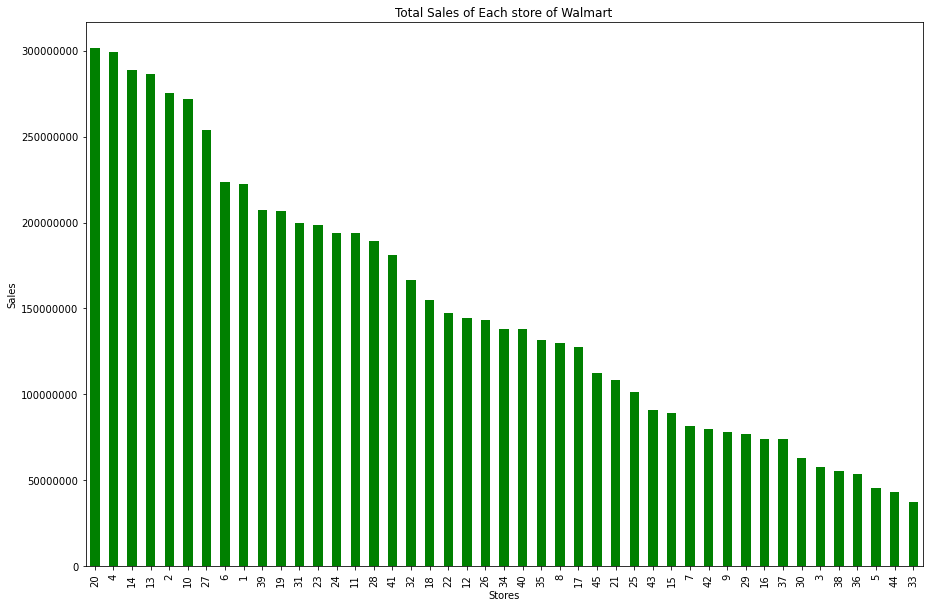

In [13]:
# store 20 has the maximum sale while store 33 has least sale, showing it graphically 

plt.figure(figsize=(15,10))
viz= Max_Sales_WalmartData.plot(kind='bar', color='green') 

plt.title('Total Sales of Each store of Walmart')
plt.xlabel('Stores')
plt.ylabel('Sales') 

plt.ticklabel_format(useOffset=False, style='plain', axis='y') # for disabling the Scientific notation 

In [14]:
# Which store has maximum standard deviation i.e., the sales vary a lot. Also, 
# find out the coefficient of mean to standard deviation


WalmartData_std=pd.DataFrame(WalmartData.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
print(WalmartData_std)

        Weekly_Sales
Store               
14     317569.949476
10     302262.062504
20     275900.562742
4      266201.442297
13     265506.995776
23     249788.038068
27     239930.135688
2      237683.694682
39     217466.454833
6      212525.855862
35     211243.457791
19     191722.638730
41     187907.162766
28     181758.967539
18     176641.510839
24     167745.677567
11     165833.887863
22     161251.350631
1      155980.767761
12     139166.871880
32     138017.252087
45     130168.526635
21     128752.812853
31     125855.942933
15     120538.652043
40     119002.112858
25     112976.788600
7      112585.469220
17     112162.936087
26     110431.288141
8      106280.829881
34     104630.164676
29      99120.136596
16      85769.680133
9       69028.666585
36      60725.173579
42      50262.925530
3       46319.631557
38      42768.169450
43      40598.413260
5       37737.965745
44      24762.832015
33      24132.927322
30      22809.665590
37      21837.461190


In [15]:
print(WalmartData_std.head(1))

# showing the store which has the maximum standard deviation(store 14 with weekly sales of 317569.949476)

        Weekly_Sales
Store               
14     317569.949476


<AxesSubplot:title={'center':'The Sale distribution of store 14'}, xlabel='Weekly_Sales', ylabel='Density'>

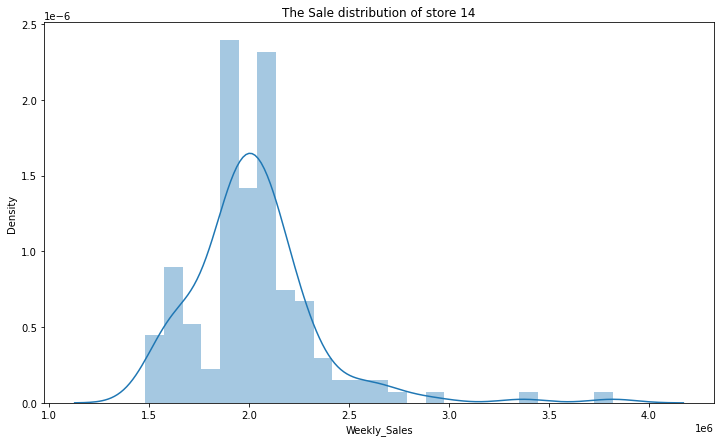

In [16]:
# plotting the graph for the store which has maximum standard deviation (Store 14) 
plt.figure(figsize=(12,7))
plt.title("The Sale distribution of store 14")
sns.distplot(WalmartData[WalmartData['Store'] == WalmartData_std.head(1).index[0]]['Weekly_Sales'])

In [17]:
# Coefficient of Variation = (Standard Deviation / Mean)

coe_mean_std = pd.DataFrame(WalmartData.groupby('Store')['Weekly_Sales'].std() / WalmartData.groupby('Store')['Weekly_Sales'].mean())

In [18]:
coe_mean_std = coe_mean_std.rename(columns={'Weekly_Sales':'coefficient of mean to standard deviation'})
print(coe_mean_std)

       coefficient of mean to standard deviation
Store                                           
1                                       0.100292
2                                       0.123424
3                                       0.115021
4                                       0.127083
5                                       0.118668
6                                       0.135823
7                                       0.197305
8                                       0.116953
9                                       0.126895
10                                      0.159133
11                                      0.122262
12                                      0.137925
13                                      0.132514
14                                      0.157137
15                                      0.193384
16                                      0.165181
17                                      0.125521
18                                      0.162845
19                  

In [19]:
coef_mean_std_max = coe_mean_std.sort_values(by='coefficient of mean to standard deviation', ascending=False)

In [20]:
print(coef_mean_std_max)

       coefficient of mean to standard deviation
Store                                           
35                                      0.229681
7                                       0.197305
15                                      0.193384
29                                      0.183742
23                                      0.179721
21                                      0.170292
45                                      0.165613
16                                      0.165181
18                                      0.162845
36                                      0.162579
25                                      0.159860
10                                      0.159133
14                                      0.157137
22                                      0.156783
39                                      0.149908
41                                      0.148177
12                                      0.137925
28                                      0.137330
6                   

<AxesSubplot:title={'center':'coefficient of mean to standard deviation for store 35'}, xlabel='Weekly_Sales', ylabel='Density'>

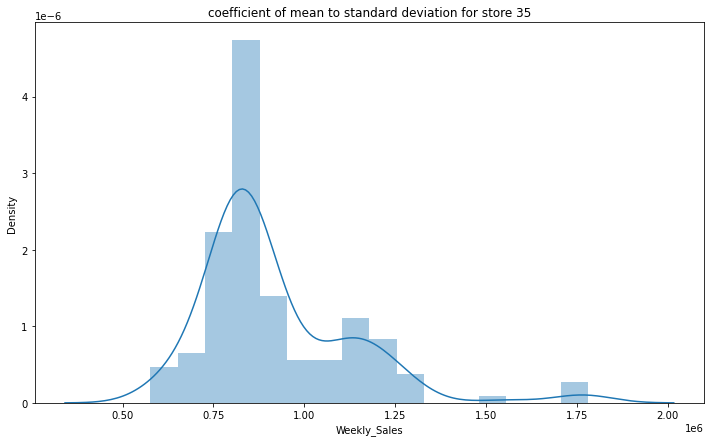

In [21]:
# plotting the graph for the store which has maximum coefficient of mean to standard deviation for (store 35)
plt.figure(figsize=(12,7))
plt.title("coefficient of mean to standard deviation for store 35")
sns.distplot(WalmartData[WalmartData['Store'] == coef_mean_std_max.head(1).index[0]]['Weekly_Sales'])

In [22]:
# Which store/s has good quarterly growth rate in Q3’2012

# January, February, and March (Q1) April, May, and June (Q2) July, August, and September 
# (Q3) October, November, and December (Q4) we have date untill 2012-11-01

In [23]:
WalmartData_2012=WalmartData1[WalmartData1['Year']==2012]

In [24]:
WalmartData_2012

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
100,1,2012-06-01,1550369.92,0,49.01,3.157,219.714258,7.348,1,6,2012
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,13,1,2012
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,20,1,2012
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,27,1,2012
104,1,2012-03-02,1636339.65,0,56.55,3.360,220.172015,7.348,2,3,2012
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [25]:
# Sales for the Q2 (Second quarter)

Q2= WalmartData_2012[(WalmartData_2012['Date'] > '2012-04-01') 
                     & (WalmartData_2012['Date'] < '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()

In [26]:
print(Q2)

Store
1     21036965.58
2     25085123.61
3      5562668.16
4     28384185.16
5      4427262.21
6     20728970.16
7      7613593.92
8     11934275.61
9      7431320.13
10    23598433.93
11    17879095.77
12    13193365.04
13    26803225.55
14    24427769.06
15     7867952.23
16     6626133.44
17    12918892.02
18    13834706.08
19    18315278.56
20    27550180.62
21     9226279.62
22    13329065.39
23    18283424.90
24    17768191.98
25     9247467.19
26    13218289.66
27    22593640.73
28    16985999.95
29     7034493.19
30     5786335.45
31    18249155.35
32    15415236.21
33     3512138.05
34    12858027.98
35    10753570.97
36     4090378.90
37     6859777.96
38     5732362.70
39    20191585.63
40    12849747.45
41    17560035.88
42     7608247.31
43     8239792.67
44     4322555.33
45    10278900.05
Name: Weekly_Sales, dtype: float64


In [27]:
Q3= WalmartData_2012[(WalmartData_2012['Date'] > '2012-07-01') 
                     & (WalmartData_2012['Date']< '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

In [28]:
print(Q3)

Store
1     18633209.98
2     22396867.61
3      4966495.93
4     25652119.35
5      3880621.88
6     18341221.11
7      7322393.92
8     10873860.34
9      6528239.56
10    21169356.45
11    16094363.07
12    11777508.50
13    24319994.35
14    20140430.40
15     6909374.37
16     6441311.11
17    11533998.38
18    12507521.72
19    16644341.31
20    24665938.11
21     8403507.99
22    11818544.33
23    17103654.36
24    16125999.86
25     8309440.44
26    12417575.35
27    20191238.11
28    15055659.67
29     6127862.07
30     5181974.44
31    16454328.46
32    14142164.84
33     3177072.43
34    11476258.98
35    10252122.68
36     3578123.58
37     6250524.08
38     5129297.64
39    18899955.17
40    11647661.37
41    16373588.44
42     6830839.86
43     7376726.03
44     4020486.01
45     8851242.32
Name: Weekly_Sales, dtype: float64


In [29]:
good_Q_rate=(Q3+Q2)

print(good_Q_rate.sort_values(ascending=False))  

Store
4     54036304.51
20    52216118.73
13    51123219.90
2     47481991.22
10    44767790.38
14    44568199.46
27    42784878.84
1     39670175.56
39    39091540.80
6     39070191.27
23    35387079.26
19    34959619.87
31    34703483.81
11    33973458.84
41    33933624.32
24    33894191.84
28    32041659.62
32    29557401.05
18    26342227.80
26    25635865.01
22    25147609.72
12    24970873.54
40    24497408.82
17    24452890.40
34    24334286.96
8     22808135.95
35    21005693.65
45    19130142.37
21    17629787.61
25    17556907.63
43    15616518.70
7     14935987.84
15    14777326.60
42    14439087.17
9     13959559.69
29    13162355.26
37    13110302.04
16    13067444.55
30    10968309.89
38    10861660.34
3     10529164.09
44     8343041.34
5      8307884.09
36     7668502.48
33     6689210.48
Name: Weekly_Sales, dtype: float64


<AxesSubplot:xlabel='Store'>

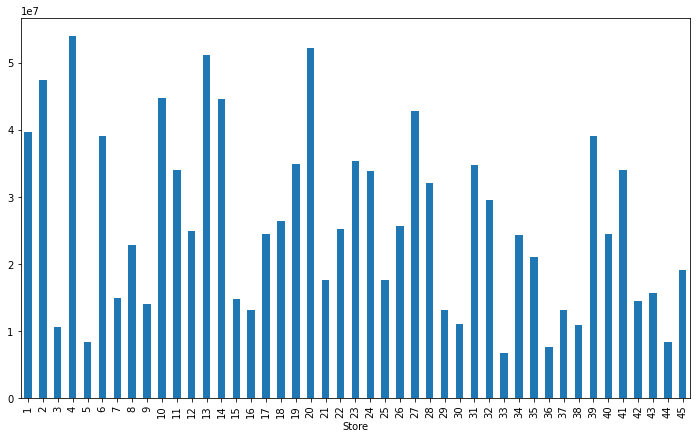

In [30]:
plt.figure(figsize=(12,7))
good_Q_rate.plot(kind='bar')

In [31]:
WalmartData_Q32012 = WalmartData[(pd.to_datetime(WalmartData['Date']) >= pd.to_datetime('07-01-2012')) & (pd.to_datetime(WalmartData['Date']) <= pd.to_datetime('09-30-2012'))]
WalmartData_growth = WalmartData_Q32012.groupby(['Store'])['Weekly_Sales'].sum()
print("Store Number {} has Good Quartely Growth in Q3'2012 {}".format(WalmartData_growth.idxmax(),WalmartData_growth.max()))

Store Number 4 has Good Quartely Growth in Q3'2012 25652119.35


# Holiday Events
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [32]:
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

In [33]:
# Yearly Sales in Holidays

Super_Bowl_WalmartData=pd.DataFrame(WalmartData1.loc[WalmartData1.Date.isin(Super_Bowl)].groupby('Year')['Weekly_Sales'].sum())

Labour_Day_WalmartData=pd.DataFrame(WalmartData1.loc[WalmartData1.Date.isin(Labour_Day)].groupby('Year')['Weekly_Sales'].sum())

Thanksgiving_WalmartData=pd.DataFrame(WalmartData1.loc[WalmartData1.Date.isin(Thanksgiving)].groupby('Year')['Weekly_Sales'].sum())

Christmas_WalmartData=pd.DataFrame(WalmartData1.loc[WalmartData1.Date.isin(Christmas)].groupby('Year')['Weekly_Sales'].sum())

TotalSales=WalmartData1.groupby('Year')['Weekly_Sales']

In [34]:
print(Super_Bowl_WalmartData)
print(Labour_Day_WalmartData)
print(Thanksgiving_WalmartData)
print(Christmas_WalmartData)

      Weekly_Sales
Year              
2010   48336677.63
2011   47336192.79
2012   50009407.92
      Weekly_Sales
Year              
2010   45634397.84
2011   46763227.53
2012   48330059.31
      Weekly_Sales
Year              
2010   65821003.24
2011   66593605.26
      Weekly_Sales
Year              
2010   40432519.00
2011   46042461.04


Text(0.5, 1.0, 'Christmas Holiday')

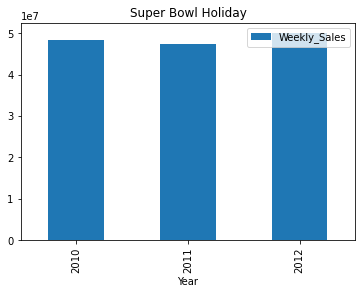

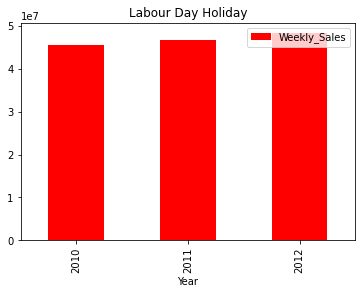

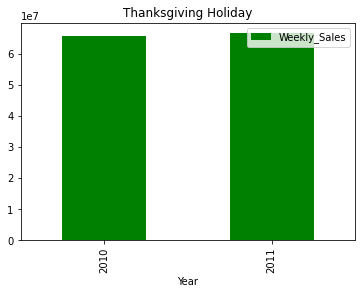

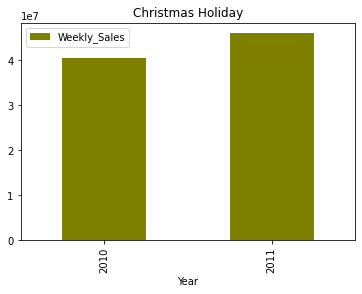

In [35]:
# plotting Yearly Sale in the Holidays
Super_Bowl_WalmartData.plot(kind='bar')
plt.title("Super Bowl Holiday")

Labour_Day_WalmartData.plot(kind='bar', color='red')
plt.title("Labour Day Holiday")

Thanksgiving_WalmartData.plot(kind='bar', color='green')
plt.title("Thanksgiving Holiday")

Christmas_WalmartData.plot(kind='bar', color='olive')
plt.title("Christmas Holiday")

In [36]:
# It can be clearly seen that in Thanksgiving Sale increased. However, in the Christmas Sale decreased.

In [37]:
# for Holiday Sales
stores_Holiday_Sales = WalmartData[WalmartData['Holiday_Flag'] == 1]

In [38]:
# Non-Holiday Sales for all stores together

non_Holiday=WalmartData[WalmartData['Holiday_Flag']==0]

In [39]:
non_Holiday_Sales_Stores_mean = non_Holiday.groupby(['Date']).agg({'Weekly_Sales':'mean'}).reset_index()


stores_Holiday_Sales_sum = stores_Holiday_Sales.groupby(['Date']).agg({'Weekly_Sales':'sum'}).reset_index()

In [40]:
# iterating in the data with itertuples function
for i in stores_Holiday_Sales_sum.itertuples():
    for i1 in non_Holiday_Sales_Stores_mean.itertuples():
        if i.Weekly_Sales>i1.Weekly_Sales:
            print("On Date {} Holiday Sales is greater than Non Holiday Sales and the Sales figures are :- {}".format(i.Date,i.Weekly_Sales))
            break;
        

On Date 07-09-2012 Holiday Sales is greater than Non Holiday Sales and the Sales figures are :- 48330059.31
On Date 09-09-2011 Holiday Sales is greater than Non Holiday Sales and the Sales figures are :- 46763227.529999994
On Date 10-02-2012 Holiday Sales is greater than Non Holiday Sales and the Sales figures are :- 50009407.919999994
On Date 10-09-2010 Holiday Sales is greater than Non Holiday Sales and the Sales figures are :- 45634397.84
On Date 11-02-2011 Holiday Sales is greater than Non Holiday Sales and the Sales figures are :- 47336192.79000002
On Date 12-02-2010 Holiday Sales is greater than Non Holiday Sales and the Sales figures are :- 48336677.63000002
On Date 25-11-2011 Holiday Sales is greater than Non Holiday Sales and the Sales figures are :- 66593605.25999998
On Date 26-11-2010 Holiday Sales is greater than Non Holiday Sales and the Sales figures are :- 65821003.23999999
On Date 30-12-2011 Holiday Sales is greater than Non Holiday Sales and the Sales figures are :- 46

Text(0, 0.5, 'Sales in Units')

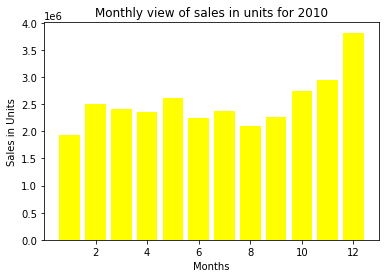

In [41]:
# A monthly view of sales in units and give insights

plt.bar(WalmartData1[WalmartData1.Year==2010]["Month"],WalmartData1[WalmartData1.Year==2010]["Weekly_Sales"], color= 'yellow')
plt.title('Monthly view of sales in units for 2010')
plt.xlabel('Months')
plt.ylabel('Sales in Units')

Text(0, 0.5, 'Sales in Units')

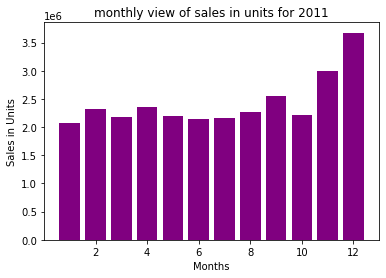

In [42]:
plt.bar(WalmartData1[WalmartData1.Year==2011]['Month'],WalmartData1[WalmartData1.Year==2011]['Weekly_Sales'],color='purple')
plt.title('monthly view of sales in units for 2011')
plt.xlabel('Months')
plt.ylabel('Sales in Units')

Text(0, 0.5, 'Sales in Units')

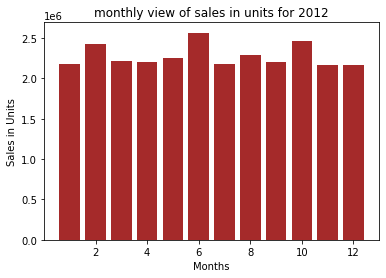

In [43]:
plt.bar(WalmartData1[WalmartData1.Year==2012]['Month'], WalmartData1[WalmartData1.Year==2012]['Weekly_Sales'],color='brown')
plt.title('monthly view of sales in units for 2012')
plt.xlabel('Months')
plt.ylabel('Sales in Units')

<Figure size 720x432 with 0 Axes>

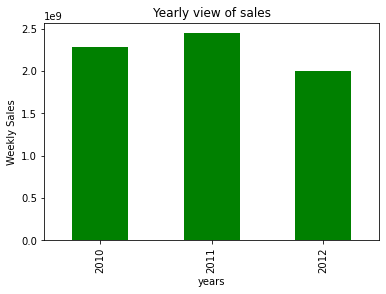

In [44]:
# Yearly sales
plt.figure(figsize=(10,6))
WalmartData1.groupby("Year")[["Weekly_Sales"]].sum().plot(kind='bar', color='green', legend=False)
plt.xlabel("years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales");

Text(0.5, 1.0, 'Monthly view of sales for all years')

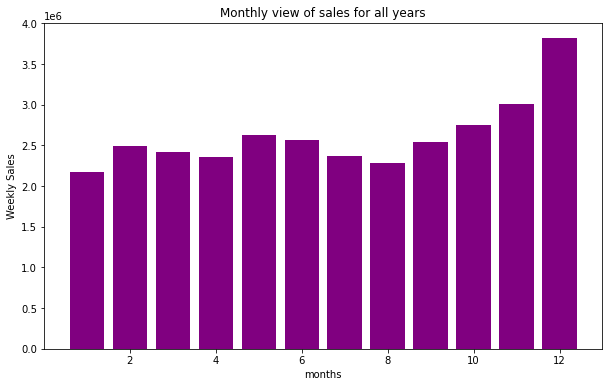

In [45]:
# Monthly view of sales for all years
plt.figure(figsize=(10,6))
plt.bar(WalmartData1["Month"],WalmartData1["Weekly_Sales"], color='purple')
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales for all years")

<AxesSubplot:>

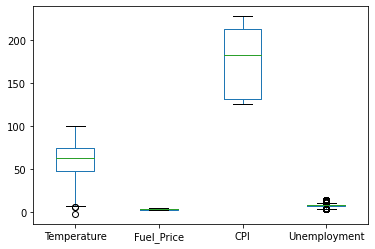

In [46]:
# Finding outliers in the Dataset

out = WalmartData[['Temperature','Fuel_Price','CPI','Unemployment']]
out.plot(kind='box')

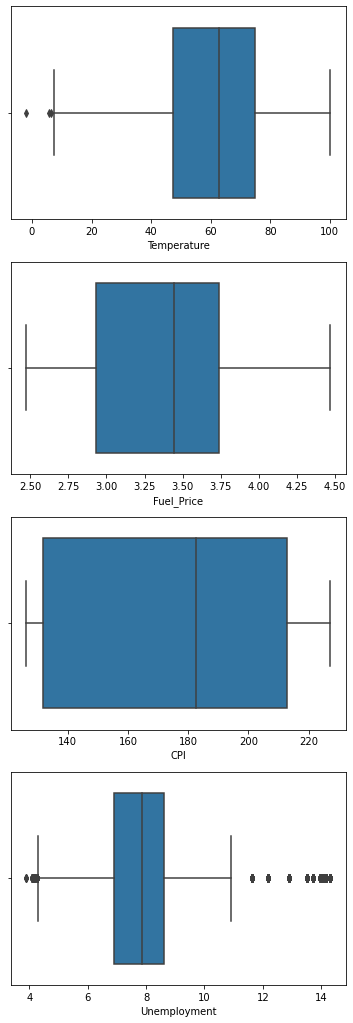

In [47]:
fig, axs = plt.subplots(4,figsize=(6,18))
for i,column in enumerate(out):
    sns.boxplot(WalmartData[column], ax=axs[i])

In [48]:
# dropping the outliers     
new_WalmartData = WalmartData[(WalmartData['Unemployment']<10) & (WalmartData['Unemployment']>4.5) & (WalmartData['Temperature']>10)]
new_WalmartData

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


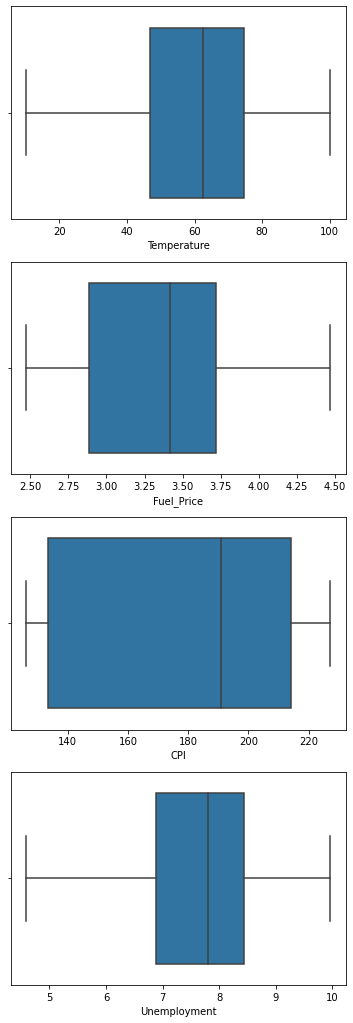

In [49]:
# checking outliers 
fig, axs = plt.subplots(4,figsize=(6,18))
X = new_WalmartData[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(new_WalmartData[column], ax=axs[i])

In [50]:
WalmartData.Store.value_counts() # store 1 has 143 columns 

4     143
2     143
10    143
14    143
18    143
22    143
26    143
30    143
34    143
38    143
42    143
3     143
7     143
11    143
15    143
19    143
23    143
27    143
31    143
35    143
39    143
6     143
45    143
8     143
41    143
12    143
16    143
20    143
24    143
28    143
32    143
36    143
40    143
44    143
1     143
5     143
9     143
13    143
17    143
21    143
25    143
29    143
33    143
37    143
43    143
Name: Store, dtype: int64

# 
Statistical Model

For Store 1 – Build  prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

Select the model which gives best accuracy.

In [51]:
X= WalmartData[WalmartData['Store'] ==1][['Store','Date']]
date_obj = WalmartData[WalmartData['Store'] ==1][['Date']]
date_obj.index +=1
X.Date = date_obj.index
X.head(10)

,Store,Date
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
5,1,6
6,1,7
7,1,8
8,1,9
9,1,10


In [52]:
y= WalmartData[WalmartData['Store'] ==1]['Weekly_Sales']
y.head()

0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [54]:
#Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb #2010 
# (starting from the earliest date in order). Hypothesize if CPI, unemployment, and 
#fuel price have any impact on sales.

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
New_Dataset= WalmartData[WalmartData['Store'] ==1][['Store','CPI','Unemployment','Fuel_Price']]
New_Dataset.head()

,Store,CPI,Unemployment,Fuel_Price
0,1,211.096358,8.106,2.572
1,1,211.242170,8.106,2.548
2,1,211.289143,8.106,2.514
3,1,211.319643,8.106,2.561
4,1,211.350143,8.106,2.625


In [55]:
cpi = WalmartData[WalmartData['Store'] ==1]['CPI'].astype('int64')
unemployment = WalmartData[WalmartData['Store'] ==1]['Unemployment'].astype('int64')

In [56]:
print(cpi)
print(unemployment)

0      211
1      211
2      211
3      211
4      211
      ... 
138    222
139    223
140    223
141    223
142    223
Name: CPI, Length: 143, dtype: int64
0      8
1      8
2      8
3      8
4      8
      ..
138    6
139    6
140    6
141    6
142    6
Name: Unemployment, Length: 143, dtype: int64


In [57]:
X_train_cpi,X_test_cpi,y_train_cpi,y_test_cpi = train_test_split(New_Dataset,cpi,random_state=42)
X_train_unemp,X_test_unemp,y_train_unemp,y_test_unemp = train_test_split(New_Dataset,unemployment,random_state=42)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_cpi,y_train_cpi)
y_pred = log_reg.predict(X_test_cpi)
log_reg.fit(X_train_unemp,y_train_unemp)
y_pred_unemp = log_reg.predict(X_test_unemp)

In [58]:
from sklearn import metrics

print(metrics.accuracy_score(y_test_cpi,y_pred))

print(metrics.accuracy_score(y_test_unemp,y_pred_unemp))

0.6111111111111112
0.9166666666666666


In [59]:
print('CPI Actual :', y_test_cpi.values[0:36])
print('CPI Predicted :', y_pred[0:36])
print('Unemployment Actual :', y_test_unemp.values[0:36])
print('Unemployment Predicted:', y_pred_unemp[0:36])

CPI Actual : [221 211 215 219 213 210 221 215 215 211 212 215 218 222 219 215 211 215
 221 215 210 221 221 221 213 211 210 211 211 221 211 219 211 210 210 218]
CPI Predicted : [221 211 215 221 215 211 221 215 215 211 211 215 217 221 221 215 211 215
 221 215 211 221 221 221 211 211 211 211 211 221 211 221 211 211 211 217]
Unemployment Actual : [7 7 7 7 7 7 6 7 7 7 7 7 7 6 7 7 7 7 7 7 7 7 7 7 7 7 7 8 7 7 7 7 7 7 7 7]
Unemployment Predicted: [7 7 7 7 7 7 6 7 7 7 7 7 7 6 7 7 7 7 6 7 7 7 7 7 7 7 7 7 7 6 7 7 7 7 7 7]


In [60]:
WalmartData['Day'] = pd.to_datetime(WalmartData['Date']).dt.day_name()
WalmartData.head(15)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Sunday
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Thursday
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Friday
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Friday
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Monday
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106,Friday
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106,Friday
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106,Friday
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808,Thursday
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808,Saturday


In [61]:
# Trying different model (XGBoost,Regressor and Classifier) doing additional task
from xgboost import XGBRegressor
XGBR= XGBRegressor()
XGBR.fit(X_train,y_train)
New_Dataset_XGBR= WalmartData[WalmartData['Store'] ==1][['Store','CPI','Unemployment','Fuel_Price']]
New_Dataset_XGBR.head()

,Store,CPI,Unemployment,Fuel_Price
0,1,211.096358,8.106,2.572
1,1,211.242170,8.106,2.548
2,1,211.289143,8.106,2.514
3,1,211.319643,8.106,2.561
4,1,211.350143,8.106,2.625


In [62]:
X_train_cpi_XGBC,X_test_cpi_XGBC,y_train_cpi_XGBC,y_test_cpi_XGBC = train_test_split(New_Dataset_XGBR,cpi,random_state=42)
X_train_unemp_XGBC,X_test_unemp_XGBC,y_train_unemp_XGBC,y_test_unemp_XGBC = train_test_split(New_Dataset_XGBR,unemployment,random_state=42)

from xgboost import XGBClassifier

XGBC = XGBClassifier()
XGBC.fit(X_train_cpi_XGBC,y_train_cpi_XGBC)
y_pred = XGBC.predict(X_test_cpi_XGBC)
XGBC.fit(X_train_unemp_XGBC,y_train_unemp_XGBC)
y_pred_unemp = XGBC.predict(X_test_unemp_XGBC)

[15:42:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [63]:
from sklearn import metrics

print(metrics.accuracy_score(y_test_cpi_XGBC,y_pred))

print(metrics.accuracy_score(y_test_unemp_XGBC,y_pred_unemp)) # Xgboost giving the more accuracy than the with linear regression,logistic Regression

0.8611111111111112
0.9722222222222222


In [64]:
print('CPI Actual :', y_test_cpi_XGBC.values[0:36])
print('CPI Predicted :', y_pred[0:36])
print('Unemployment Actual :', y_test_unemp_XGBC.values[0:36])
print('Unemployment Predicted:', y_pred_unemp[0:36])

CPI Actual : [221 211 215 219 213 210 221 215 215 211 212 215 218 222 219 215 211 215
 221 215 210 221 221 221 213 211 210 211 211 221 211 219 211 210 210 218]
CPI Predicted : [221 211 215 218 214 210 221 215 222 211 212 215 218 221 219 215 211 215
 221 215 210 221 221 221 213 211 210 211 211 221 211 219 211 210 210 217]
Unemployment Actual : [7 7 7 7 7 7 6 7 7 7 7 7 7 6 7 7 7 7 7 7 7 7 7 7 7 7 7 8 7 7 7 7 7 7 7 7]
Unemployment Predicted: [7 7 7 7 7 7 6 7 7 7 7 7 7 6 7 7 7 7 6 7 7 7 7 7 7 7 7 8 7 7 7 7 7 7 7 7]


In [65]:
WalmartData['Day'] = pd.to_datetime(WalmartData['Date']).dt.day_name()
WalmartData.head(15)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Sunday
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Thursday
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Friday
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Friday
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Monday
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106,Friday
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106,Friday
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106,Friday
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808,Thursday
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808,Saturday
